# This is the Juypter Notebook containing simulations for Theorem 4 in the paper "Networked Competitive Bivirus SIS Model - Analysis of the Discrete-Time Case"

In [167]:
import bivirus
import numpy as np
import importlib
importlib.reload(bivirus)

<module 'bivirus' from '/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py'>

The Following Simulations demonstrates the stability of the endemic equilibria $(\bar{x}^1, 0)$ when  
$\rho(I - h D^2 + (I - \bar{X}^1)B^2) \leq 1$

In [168]:
def path_graph_adjacency(n, W = 1):
    A = np.zeros((n, n))
    for i in range(n - 1):
        A[i, i + 1] = np.random.uniform(0, W)
        A[i + 1, i] = np.random.uniform(0, W)
    return A

In [169]:
# configurations of the experiment
config = bivirus.SimulationConfig(N=20, h=0.001, threshold=1.5, W=2, iterations=10000, tolerance=1e-6)

# random seed for reproducibility
seed = 1049
np.random.seed(seed)

# parameters of the model
A1_raw, A2_raw = np.random.uniform(0, config.W, (config.N, config.N)), np.random.uniform(0, config.W, (config.N, config.N))
# Set all values in A below 'threshold' to zero
A1_thres = np.where(A1_raw < config.threshold, 0, A1_raw)
A2_thres = np.where(A2_raw < config.threshold, 0, A2_raw)

# add the path graph adjacency matrix to ensure strong connectivity
A1 = A1_thres + path_graph_adjacency(config.N, W=config.W/10)
A2 = A2_thres + path_graph_adjacency(config.N, W=config.W/10)

beta = [
    20 * np.ones(config.N),
    0.3 * np.ones(config.N)
]
B1 = np.diag(beta[0]) @ A1
B2 = np.diag(beta[1]) @ A2
B = [B1, B2]
delta = [
    0.1 * np.ones(config.N),
    2 * np.ones(config.N)
]
print("B1 is:", B1)
print()
print("B2 is:", B2)

B1 is: [[30.01019213 37.72112128  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         31.24229816
  33.51252856  0.        ]
 [ 3.9983366  35.85397951  3.42231204  0.         37.96790053 35.07449523
   0.          0.         32.32859708 39.78959292  0.          0.
   0.          0.          0.         38.25814336  0.         36.58301318
   0.          0.        ]
 [ 0.          3.05106031  0.         36.27835814  0.          0.
   0.         37.06482692  0.          0.          0.          0.
   0.         32.60937851 30.51507438 30.55426254  0.          0.
  30.1965415   0.        ]
 [ 0.         34.6779467  39.03757777  0.          2.12401806 33.94937833
   0.          0.         37.90514239  0.          0.          0.
  32.9441512   0.         39.86596906  0.          0.          0.
   0.         30.40201997]
 [ 0.          0.          0.          1.19332015  0.        

/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_78337/1715753872.py:22: RuntimeWarning: divide by zero encountered in matmul
  B1 = np.diag(beta[0]) @ A1
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_78337/1715753872.py:22: RuntimeWarning: overflow encountered in matmul
  B1 = np.diag(beta[0]) @ A1
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_78337/1715753872.py:22: RuntimeWarning: invalid value encountered in matmul
  B1 = np.diag(beta[0]) @ A1
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_78337/1715753872.py:23: RuntimeWarning: divide by zero encountered in matmul
  B2 = np.diag(beta[1]) @ A2
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_78337/1715753872.py:23: RuntimeWarning: overflow encountered in matmul
  B2 = np.diag(beta[1]) @ A2
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_78337/1715753872.py:23: RuntimeWarning: invalid value encountered in matmul
  B2 = np.diag(beta[1]) @ A2


In [170]:
# check assumptions of the theorems 2 and 3
print("Assumptions of theorems:")
print("Theorem 2 satisfied:", bivirus.check_theorem_2(B, delta, config))
print("Theorem 3:", bivirus.check_theorem_3(B, delta, config))

Assumptions of theorems:
spectral radius 1 is 1.171808795702707
spectral radius 2 is 1.0007597447751355
Theorem 2 satisfied: False
Theorem 3: 0


The two code blocks below represent two different initialization strategies for the same model(i.e., same network, same parameters)

All assumptions satisfied
x_bar Converged at iteration 147
x1_bar is: [0.99924532 0.99962012 0.9995006  0.99960135 0.9995272  0.99929963
 0.99928622 0.99947047 0.99931397 0.99964395 0.99905104 0.99869255
 0.99899421 0.99901496 0.99941908 0.99946098 0.99929184 0.99958762
 0.99913526 0.99928104]
x_bar Converged at iteration 147
x1_bar_avg is: 0.9993218711405149
x1 is [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25]
x2 is [0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875
 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875]
Main loop Converged at iteration 3732
spectral radius 1 is 1.171808795702707
spectral radius 2 is 1.0007597447751355
x_bar Converged at iteration 147
x_bar Converged at iteration 7557
det radius 1 is 0.9998784399995224
det radius 2 is 128.5116767991375
This experiment satisfies Theorem:  4.2
All assumptions satisfied
x_bar Converged at iteration 147
x1_bar is: [0.99924532 0.999

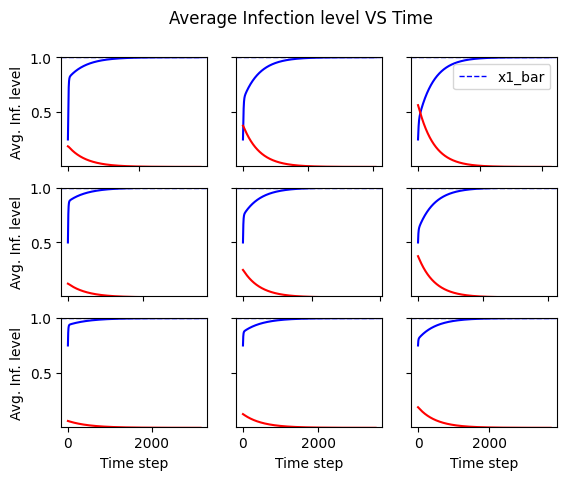

In [171]:
# initialization logic to test starting states covering "a large portion of \mathcal D"
x1_histories = []
x2_histories = []
x1_avg_histories = []
x2_avg_histories = []

x1 = np.zeros(config.N)
x2 = np.zeros(config.N)
for num1 in [0.25, 0.50, 0.75]:
    num2bound = 1 - num1
    num2list = [num2bound * (i + 1) / 4 for i in range(3)]
    for num2 in num2list:

        x1.fill(num1)
        x2.fill(num2)
        bivirus.check_basic_assumptions(x1, x2, B, delta, config)
        x1_bar = bivirus.x_bar(x1, B1, delta[0], config)
        print("x1_bar is:", x1_bar)
        x1_bar_avg = np.mean(bivirus.x_bar(x1, B1, delta[0], config))
        print("x1_bar_avg is:", x1_bar_avg)
        print('x1 is '+str(x1))
        print('x2 is ' + str(x2))
        results = bivirus.run_simulation(x1, x2, B, delta, config)
        print("This experiment satisfies Theorem: ", bivirus.check_theorem_4(x1, x2, B, delta, config))

        x1_histories.append(results["x1_history"])
        x2_histories.append(results["x2_history"])
        x1_avg_histories.append(results["x1_avg_history"])
        x2_avg_histories.append(results["x2_avg_history"])

bivirus.plot_simulation_3by3(x1_avg_histories, x2_avg_histories, yscale='linear', x1_bar_avg=x1_bar_avg)

All assumptions satisfied
Main loop Converged at iteration 3946
spectral radius 1 is 1.171808795702707
spectral radius 2 is 1.0007597447751355
x_bar Converged at iteration 137
x_bar Converged at iteration 3821
det radius 1 is 0.9998783978078106
det radius 2 is 128.4144163860988
This experiment satisfies Theorem:  4.2
All assumptions satisfied
Main loop Converged at iteration 3988
spectral radius 1 is 1.171808795702707
spectral radius 2 is 1.0007597447751355
x_bar Converged at iteration 134
x_bar Converged at iteration 6582
det radius 1 is 0.9998787530202676
det radius 2 is 128.5117119312998
This experiment satisfies Theorem:  4.2
All assumptions satisfied
Main loop Converged at iteration 4037
spectral radius 1 is 1.171808795702707
spectral radius 2 is 1.0007597447751355
x_bar Converged at iteration 146
x_bar Converged at iteration 3782
det radius 1 is 0.999878371384148
det radius 2 is 128.4339866535212
This experiment satisfies Theorem:  4.2
All assumptions satisfied
Main loop Converge

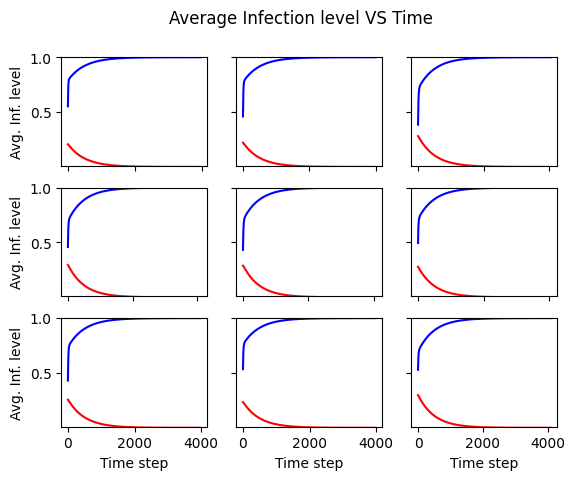

In [172]:
# Completely random initializations
x1_histories = []
x2_histories = []
x1_avg_histories = []
x2_avg_histories = []

for i in range(9):
    x1 = np.random.uniform(0, 1, config.N)
    x2 = np.random.uniform(0, 1 - x1, config.N)
    bivirus.check_basic_assumptions(x1, x2, B, delta, config)
    results = bivirus.run_simulation(x1, x2, B, delta, config)
    print("This experiment satisfies Theorem: ", bivirus.check_theorem_4(x1, x2, B, delta, config))
    x1_histories.append(results["x1_history"])
    x2_histories.append(results["x2_history"])
    x1_avg_histories.append(results["x1_avg_history"])
    x2_avg_histories.append(results["x2_avg_history"])
bivirus.plot_simulation_3by3(x1_avg_histories, x2_avg_histories, yscale='linear')

The Following Simluations demonstrates the unstability of the endemic equilibria $(\bar{x}^1, 0)$ when  
$\rho(I - hD^2 + (I - \bar{X}^1)B^2) > 1$

In [173]:
# configurations of the experiment
config = bivirus.SimulationConfig(N=20, h=0.001, W=0.5, iterations=10000, tolerance=1e-4)

# random seed for reproducibility
seed = 1049
np.random.seed(seed)

# parameters of the model
B1, B2 = np.random.uniform(0, config.W, (config.N, config.N)), np.random.uniform(0, config.W, (config.N, config.N))
# B1, B2 = np.round(B1, 2), np.round(B2, 2)

B = [B1, B2]
delta = [
    1 * np.ones(config.N),
    1 * np.ones(config.N)
]
print("B1 is:", B1)
print()
print("B2 is:", B2)

B1 is: [[0.3751274  0.42252373 0.20128587 0.17467228 0.32160502 0.08289713
  0.22224124 0.06756518 0.19099649 0.2738589  0.21188745 0.03612253
  0.03872828 0.27130289 0.15989252 0.35146187 0.25771809 0.39052873
  0.41890661 0.25899246]
 [0.24073376 0.44817474 0.03490557 0.10983307 0.47459876 0.43843119
  0.14193125 0.07331393 0.40410746 0.49736991 0.08433846 0.01124724
  0.04606262 0.07932609 0.22876339 0.47822679 0.0525655  0.45728766
  0.31777189 0.28542781]
 [0.24931478 0.29186982 0.27453013 0.45215412 0.31699776 0.35671279
  0.0813211  0.46331034 0.27509277 0.24552886 0.35944465 0.2204415
  0.05691065 0.40761723 0.38143843 0.38192828 0.22535924 0.2745854
  0.37745677 0.31549729]
 [0.0055188  0.43347433 0.44484959 0.06040182 0.35386909 0.42436723
  0.09863665 0.24996231 0.47381428 0.13630889 0.18596879 0.36269028
  0.41180189 0.27984381 0.49832461 0.06215164 0.16392833 0.10033629
  0.28820013 0.38002525]
 [0.23260674 0.24566719 0.09222087 0.32960125 0.02445267 0.46249622
  0.1665684

In [174]:
# check assumptions of the theorems 2 and 3
print("Assumptions of theorems:")
print("Theorem 2 satisfied:", bivirus.check_theorem_2(B, delta, config))
print("Theorem 3:", bivirus.check_theorem_3(B, delta, config))

Assumptions of theorems:
spectral radius 1 is 1.0038785417181626
spectral radius 2 is 1.003973378971474
Theorem 2 satisfied: False
Theorem 3: 0


The two code blocks below represent two different initialization strategies for the same model(i.e., same network, same parameters)

All assumptions satisfied
x1 is [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25]
x2 is [0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875
 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875]
Main loop Converged at iteration 1065
spectral radius 1 is 1.0038785417181626
spectral radius 2 is 1.003973378971474
x_bar Converged at iteration 1488
x_bar Converged at iteration 1557
det radius 1 is 2.055564597677411
det radius 2 is 2.0197332836459077
This experiment satisfies Theorem:  4.4
All assumptions satisfied
x1 is [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25]
x2 is [0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375
 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375]
Main loop Converged at iteration 874
spectral radius 1 is 1.0038785417181626
spectral radius 2 is 1.003973378971474
x_bar Converged at iteration 1488
x_bar Co

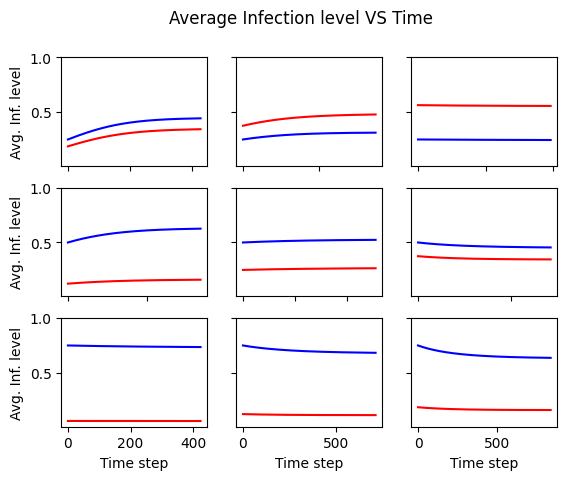

In [175]:
# initialization logic to test starting states covering "a large portion of \mathcal D"
x1_histories = []
x2_histories = []
x1_avg_histories = []
x2_avg_histories = []

x1 = np.zeros(config.N)
x2 = np.zeros(config.N)
for num1 in [0.25, 0.50, 0.75]:
    num2bound = 1 - num1
    num2list = [num2bound * (i + 1) / 4 for i in range(3)]
    for num2 in num2list:

        x1.fill(num1)
        x2.fill(num2)
        bivirus.check_basic_assumptions(x1, x2, B, delta, config)

        print('x1 is '+str(x1))
        print('x2 is ' + str(x2))
        results = bivirus.run_simulation(x1, x2, B, delta, config)
        print("This experiment satisfies Theorem: ", bivirus.check_theorem_4(x1, x2, B, delta, config))

        x1_histories.append(results["x1_history"])
        x2_histories.append(results["x2_history"])
        x1_avg_histories.append(results["x1_avg_history"])
        x2_avg_histories.append(results["x2_avg_history"])
bivirus.plot_simulation_3by3(x1_avg_histories, x2_avg_histories, yscale='linear')

All assumptions satisfied
Main loop Converged at iteration 2169
spectral radius 1 is 1.0038785417181626
spectral radius 2 is 1.003973378971474
x_bar Converged at iteration 1132
x_bar Converged at iteration 1566
det radius 1 is 2.0528776922258523
det radius 2 is 2.0195540459571553
This experiment satisfies Theorem:  4.4
All assumptions satisfied
Main loop Converged at iteration 2112
spectral radius 1 is 1.0038785417181626
spectral radius 2 is 1.003973378971474
x_bar Converged at iteration 1153
x_bar Converged at iteration 1433
det radius 1 is 2.053891940135987
det radius 2 is 2.0196802989823825
This experiment satisfies Theorem:  4.4
All assumptions satisfied
Main loop Converged at iteration 2168
spectral radius 1 is 1.0038785417181626
spectral radius 2 is 1.003973378971474
x_bar Converged at iteration 1021
x_bar Converged at iteration 1606
det radius 1 is 2.0510121769688494
det radius 2 is 2.0196086016085446
This experiment satisfies Theorem:  4.4
All assumptions satisfied
Main loop Co

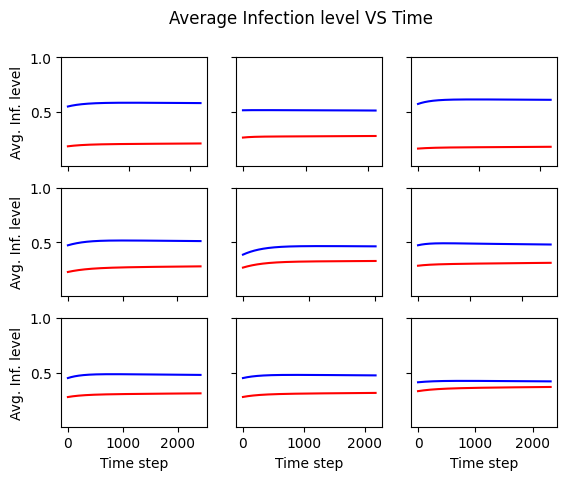

In [176]:
# Completely random initializations
x1_histories = []
x2_histories = []
x1_avg_histories = []
x2_avg_histories = []

for i in range(9):
    x1 = np.random.uniform(0, 1, config.N)
    x2 = np.random.uniform(0, 1 - x1, config.N)
    bivirus.check_basic_assumptions(x1, x2, B, delta, config)
    results = bivirus.run_simulation(x1, x2, B, delta, config)
    print("This experiment satisfies Theorem: ", bivirus.check_theorem_4(x1, x2, B, delta, config))
    x1_histories.append(results["x1_history"])
    x2_histories.append(results["x2_history"])
    x1_avg_histories.append(results["x1_avg_history"])
    x2_avg_histories.append(results["x2_avg_history"])
bivirus.plot_simulation_3by3(x1_avg_histories, x2_avg_histories, yscale='linear')